# data process

In [1]:
# import the dependance 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})

pd.set_option('expand_frame_repr', False)  # 当列太多时不换行
# pd.set_option('display.max_rows', 1000)  # 最多显示行数.
# pd.set_option('precision', 6)  # 浮点数的精度
pd.set_option('display.float_format', lambda x: '%.4f' % x)  # 设置不用科学计数法，保留两位小数.

In [2]:
# read data
df = pd.read_csv('./asset/binance_btc_1min_2019.csv')
df.describe()

,open,high,low,close,volume
count,56858.0000,56858.0000,56858.0000,56858.0000,56858.0000
mean,10184.5692,10189.4174,10179.6130,10184.5636,22.6192
std,301.3862,301.6104,301.1631,301.3873,45.3706
min,9339.9200,9356.5200,9320.0000,9339.9200,0.5993
25%,10043.4550,10049.7900,10038.1075,10043.4250,7.1979
50%,10202.9450,10206.7300,10199.2550,10202.8700,12.2045
75%,10361.9000,10366.6900,10356.6925,10361.8450,22.2169
max,10943.9900,10949.9600,10941.0000,10943.9900,2507.9824


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56858 entries, 0 to 56857
Data columns (total 6 columns):
open_time    56858 non-null object
open         56858 non-null float64
high         56858 non-null float64
low          56858 non-null float64
close        56858 non-null float64
volume       56858 non-null float64
dtypes: float64(5), object(1)
memory usage: 2.6+ MB


In [4]:
df.head()

,open_time,open,high,low,close,volume
0,2019-08-15 10:00:00,10085.6500,10085.6500,9945.8600,9992.6800,314.0711
1,2019-08-15 10:01:00,9974.5000,9995.5700,9962.3800,9985.3500,69.2413
2,2019-08-15 10:02:00,9985.3500,10083.2700,9985.0000,10050.3600,130.6083
3,2019-08-15 10:03:00,10051.9500,10104.4900,10050.3600,10073.9700,266.5547
4,2019-08-15 10:04:00,10075.9700,10104.4900,10061.6600,10102.3600,179.5553


In [6]:
# cut the reducdant info
df['open_time_local'] = pd.to_datetime(df['open_time'])
df = df[df['open_time_local']>=pd.to_datetime('2019-08-16 00:00:00')]
df.head()

,open_time,open,high,low,close,volume,open_time_local
840,2019-08-16 00:00:00,10296.7700,10296.7700,10281.9200,10282.1300,26.1619,2019-08-16 00:00:00
841,2019-08-16 00:01:00,10282.1000,10286.3900,10274.9400,10282.7200,30.7013,2019-08-16 00:01:00
842,2019-08-16 00:02:00,10282.7400,10284.2400,10271.4500,10276.9500,12.9901,2019-08-16 00:02:00
843,2019-08-16 00:03:00,10275.6000,10279.7500,10265.3400,10266.9300,13.3994,2019-08-16 00:03:00
844,2019-08-16 00:04:00,10266.5000,10272.3400,10264.6100,10269.5000,7.7376,2019-08-16 00:04:00


In [8]:
# sampling by 1h
df.set_index('open_time_local', inplace=True)
df_s = df.resample(rule='1H').agg({'open': 'first','high': 'max','low': 'min',
                                   'close': 'last','volume': 'sum',})
df_s.head()

,open,high,low,close,volume
open_time_local,,,,,
2019-08-16 00:00:00,10296.7700,10368.2900,10250.0000,10302.3600,1294.7296
2019-08-16 01:00:00,10304.4500,10398.5400,10302.4900,10353.4000,917.3373
2019-08-16 02:00:00,10353.1100,10417.0000,10327.6200,10350.3900,1120.9594
2019-08-16 03:00:00,10350.2700,10359.1100,10271.0000,10324.6100,1041.7636
2019-08-16 04:00:00,10327.0200,10342.2000,10064.8100,10091.8800,2792.1286


In [9]:
# separate time info
df_s['date'] = df_s.index.date
df_s['hour'] = df_s.index.time
df_s.head()

,open,high,low,close,volume,date,hour
open_time_local,,,,,,,
2019-08-16 00:00:00,10296.7700,10368.2900,10250.0000,10302.3600,1294.7296,2019-08-16,00:00:00
2019-08-16 01:00:00,10304.4500,10398.5400,10302.4900,10353.4000,917.3373,2019-08-16,01:00:00
2019-08-16 02:00:00,10353.1100,10417.0000,10327.6200,10350.3900,1120.9594,2019-08-16,02:00:00
2019-08-16 03:00:00,10350.2700,10359.1100,10271.0000,10324.6100,1041.7636,2019-08-16,03:00:00
2019-08-16 04:00:00,10327.0200,10342.2000,10064.8100,10091.8800,2792.1286,2019-08-16,04:00:00


In [13]:
# calcu the fluc
df_s["fluc_pct"] =df_s['close'].pct_change(1)

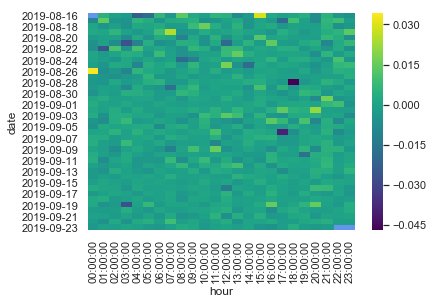

In [14]:
# plot heatmap
result = df_s.pivot(index='date', columns='hour', values='fluc_pct')
sns.heatmap(result, annot=False, fmt="g", cmap='viridis', cbar=True)
plt.show()